In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/leaf-classification/train.csv.zip
/kaggle/input/leaf-classification/sample_submission.csv.zip
/kaggle/input/leaf-classification/images.zip
/kaggle/input/leaf-classification/test.csv.zip


In [2]:
train = pd.read_csv('/kaggle/input/leaf-classification/train.csv.zip')
test = pd.read_csv('/kaggle/input/leaf-classification/test.csv.zip')
sample_sub=pd.read_csv("/kaggle/input/leaf-classification/sample_submission.csv.zip")

In [3]:
train

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


Acer_Opalus                    10
Crataegus_Monogyna             10
Acer_Mono                      10
Magnolia_Heptapeta             10
Acer_Capillipes                10
                               ..
Alnus_Rubra                    10
Rhododendron_x_Russellianum    10
Cytisus_Battandieri            10
Liriodendron_Tulipifera        10
Sorbus_Aria                    10
Name: species, Length: 99, dtype: int64

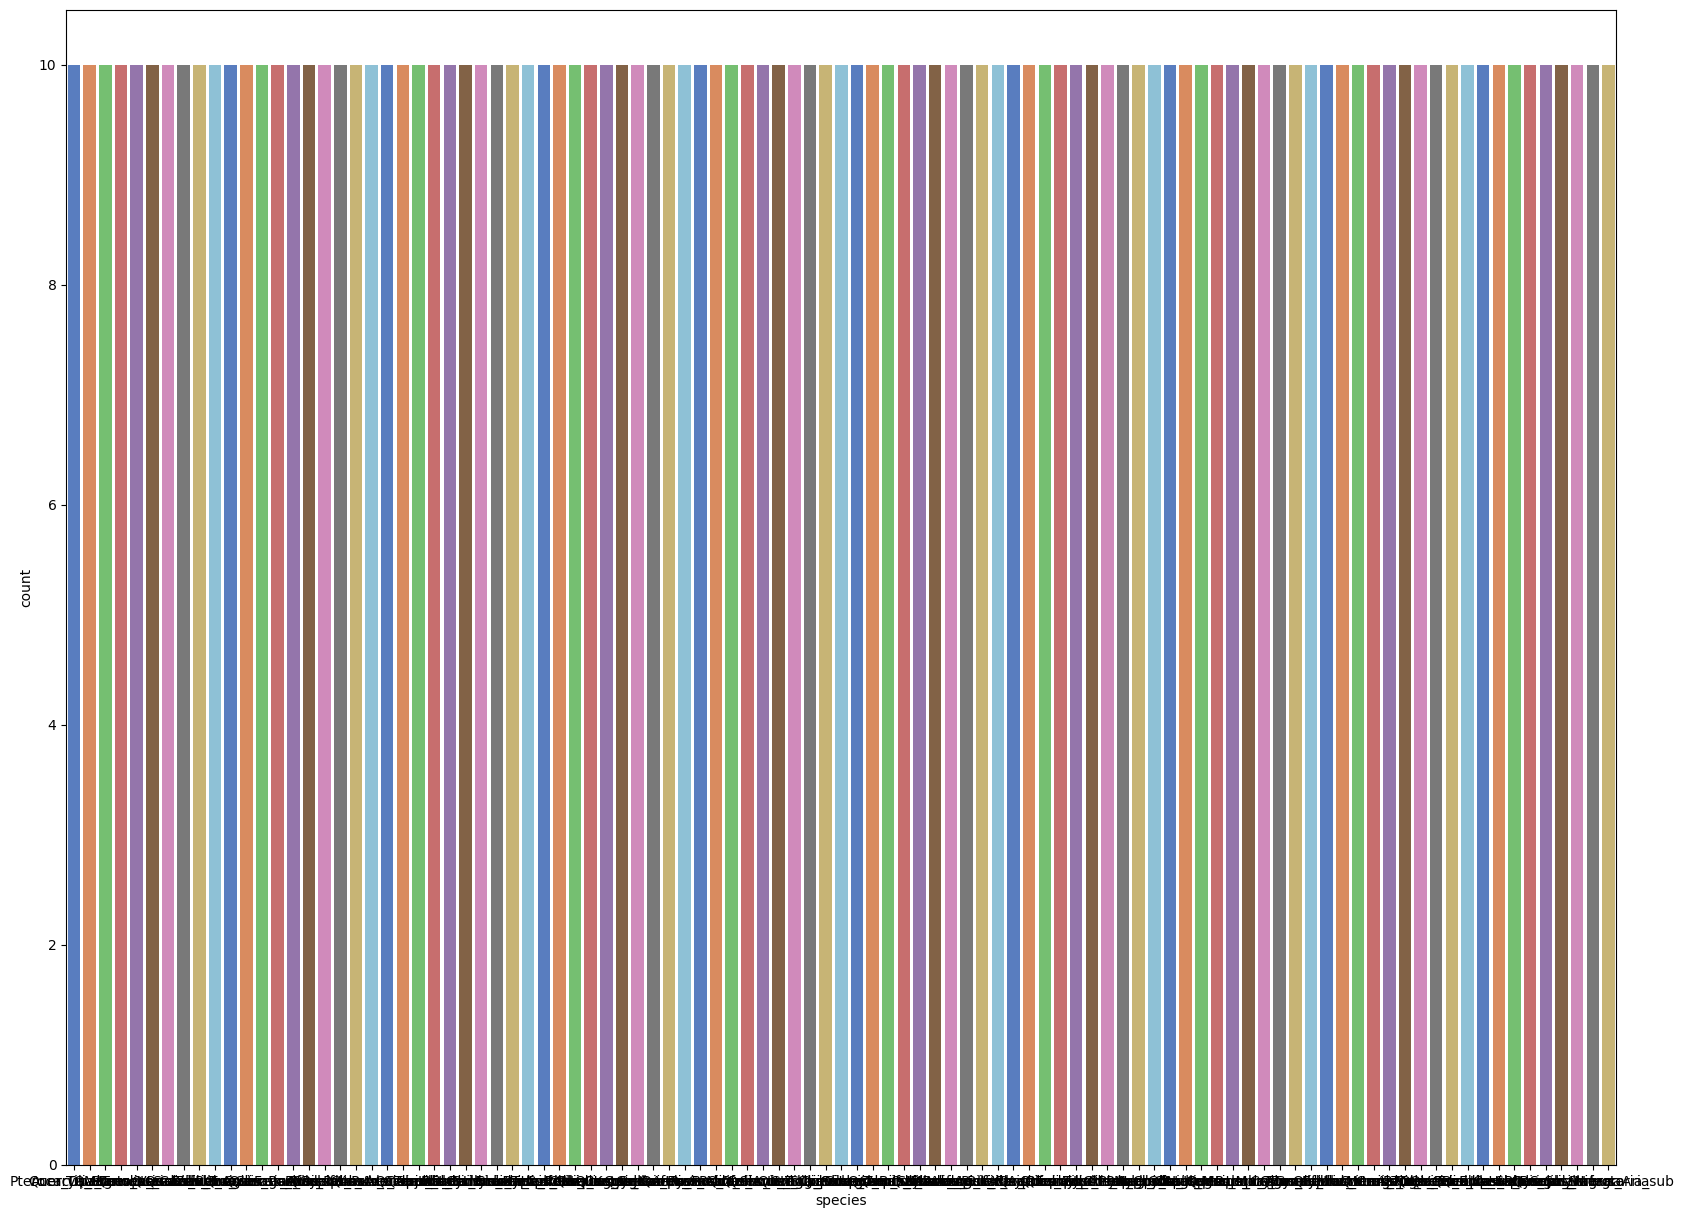

In [4]:
plt.figure(figsize=(20,15))
sns.countplot(x="species", data=train, palette="muted")
train["species"].value_counts()


In [5]:
train.isnull().sum()

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

In [6]:
train.corr()

/tmp/ipykernel_20/2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,1.000000,-0.011673,-0.027565,-0.059533,0.001639,-0.002419,-0.051818,0.061214,-0.039509,-0.070954,...,-0.040292,-0.005132,-0.043101,0.063337,-0.007915,-0.000823,0.026319,0.032873,0.024299,0.035396
margin1,-0.011673,1.000000,0.806390,-0.182829,-0.297807,-0.475874,0.767718,0.066273,-0.094137,-0.181496,...,0.137158,-0.047771,0.126227,-0.024139,-0.168201,0.035072,-0.007581,-0.033159,-0.075171,0.030414
margin2,-0.027565,0.806390,1.000000,-0.204640,-0.315953,-0.444312,0.825762,-0.083273,-0.086428,-0.120276,...,0.154407,-0.021096,0.123834,-0.063654,-0.157842,0.081069,-0.007057,-0.037405,-0.098957,-0.029532
margin3,-0.059533,-0.182829,-0.204640,1.000000,0.120042,-0.185007,-0.163976,0.095449,0.024350,-0.000042,...,0.047347,-0.027618,0.007261,-0.021390,0.033505,-0.019850,0.084957,-0.081999,-0.148193,0.061780
margin4,0.001639,-0.297807,-0.315953,0.120042,1.000000,0.029480,-0.261437,-0.268271,-0.047693,0.227543,...,-0.071974,-0.009537,-0.050529,-0.044318,0.088857,-0.052317,0.320644,-0.073886,0.050970,0.014343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
texture60,-0.000823,0.035072,0.081069,-0.019850,-0.052317,0.006542,0.066262,-0.034094,0.048647,-0.028292,...,-0.129365,0.004412,-0.155187,0.240704,-0.183369,1.000000,-0.051838,0.265879,-0.089679,-0.190194
texture61,0.026319,-0.007581,-0.007057,0.084957,0.320644,-0.109229,-0.050498,-0.163375,-0.079283,0.088517,...,-0.002235,0.053707,-0.072814,-0.084638,-0.023539,-0.051838,1.000000,-0.063582,-0.068065,0.036374
texture62,0.032873,-0.033159,-0.037405,-0.081999,-0.073886,0.151675,-0.031555,0.015391,-0.048843,-0.031954,...,-0.217239,0.171577,-0.283316,0.563088,-0.128010,0.265879,-0.063582,1.000000,-0.058189,-0.245527
texture63,0.024299,-0.075171,-0.098957,-0.148193,0.050970,0.022299,-0.132087,-0.001364,0.027758,-0.119494,...,-0.207887,0.002057,-0.064724,-0.059866,0.156568,-0.089679,-0.068065,-0.058189,1.000000,0.029305


In [7]:
Y=train.pop('species')

In [8]:
train.pop('id')


0         1
1         2
2         3
3         5
4         6
       ... 
985    1575
986    1578
987    1581
988    1582
989    1584
Name: id, Length: 990, dtype: int64

In [9]:
X=train.values


In [10]:
Y1=Y

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
Y= labelencoder_y.fit_transform(Y)

In [13]:
Y1=Y1.values.reshape(-1,1)

In [14]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Y1 = ohe.fit_transform(Y1).toarray()
Y1.shape

(990, 99)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

# Support Vector Machine (SVC)

In [16]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred_svc =svc.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         4
          17       1.00    

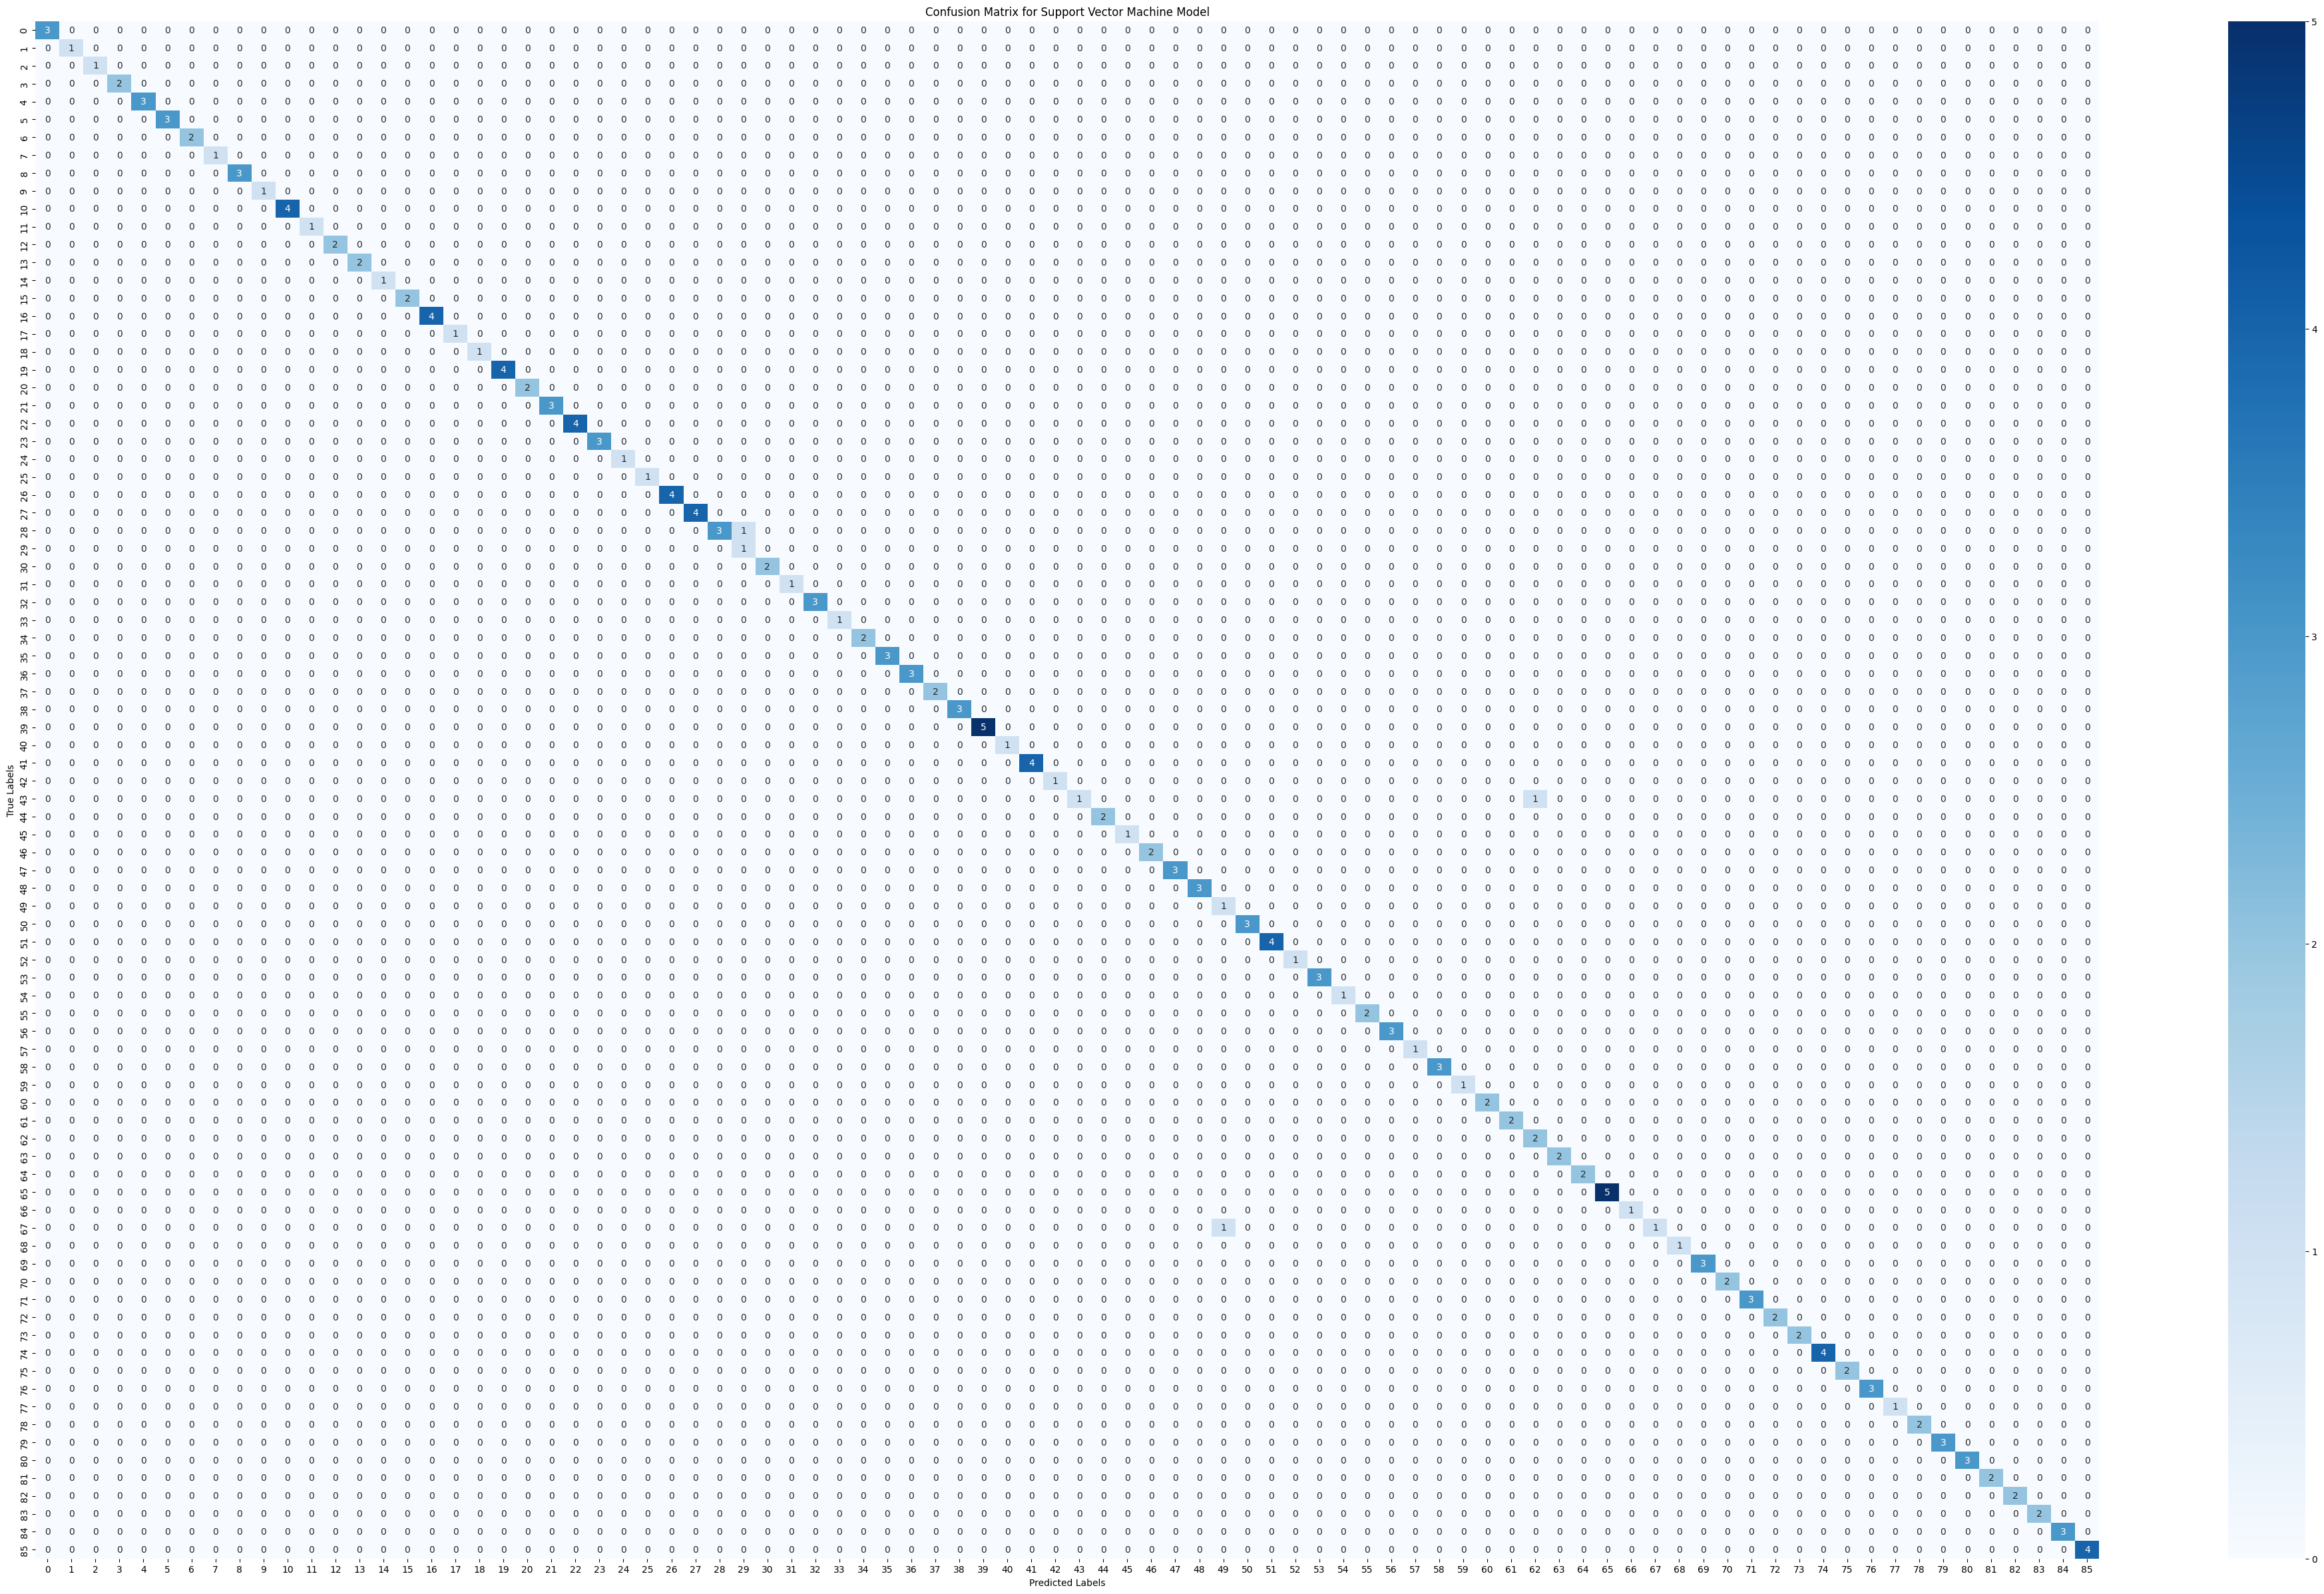

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Train and evaluate the Support Vector Machine 
svc = SVC()
svc.fit(X_train,y_train)
pred_svc =svc.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, pred_svc)
plt.figure(figsize=(50,30))

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Support Vector Machine Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# LinearDiscriminantAnalysis

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
pred_lda = lda.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, pred_lda))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         4
          17       1.00    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


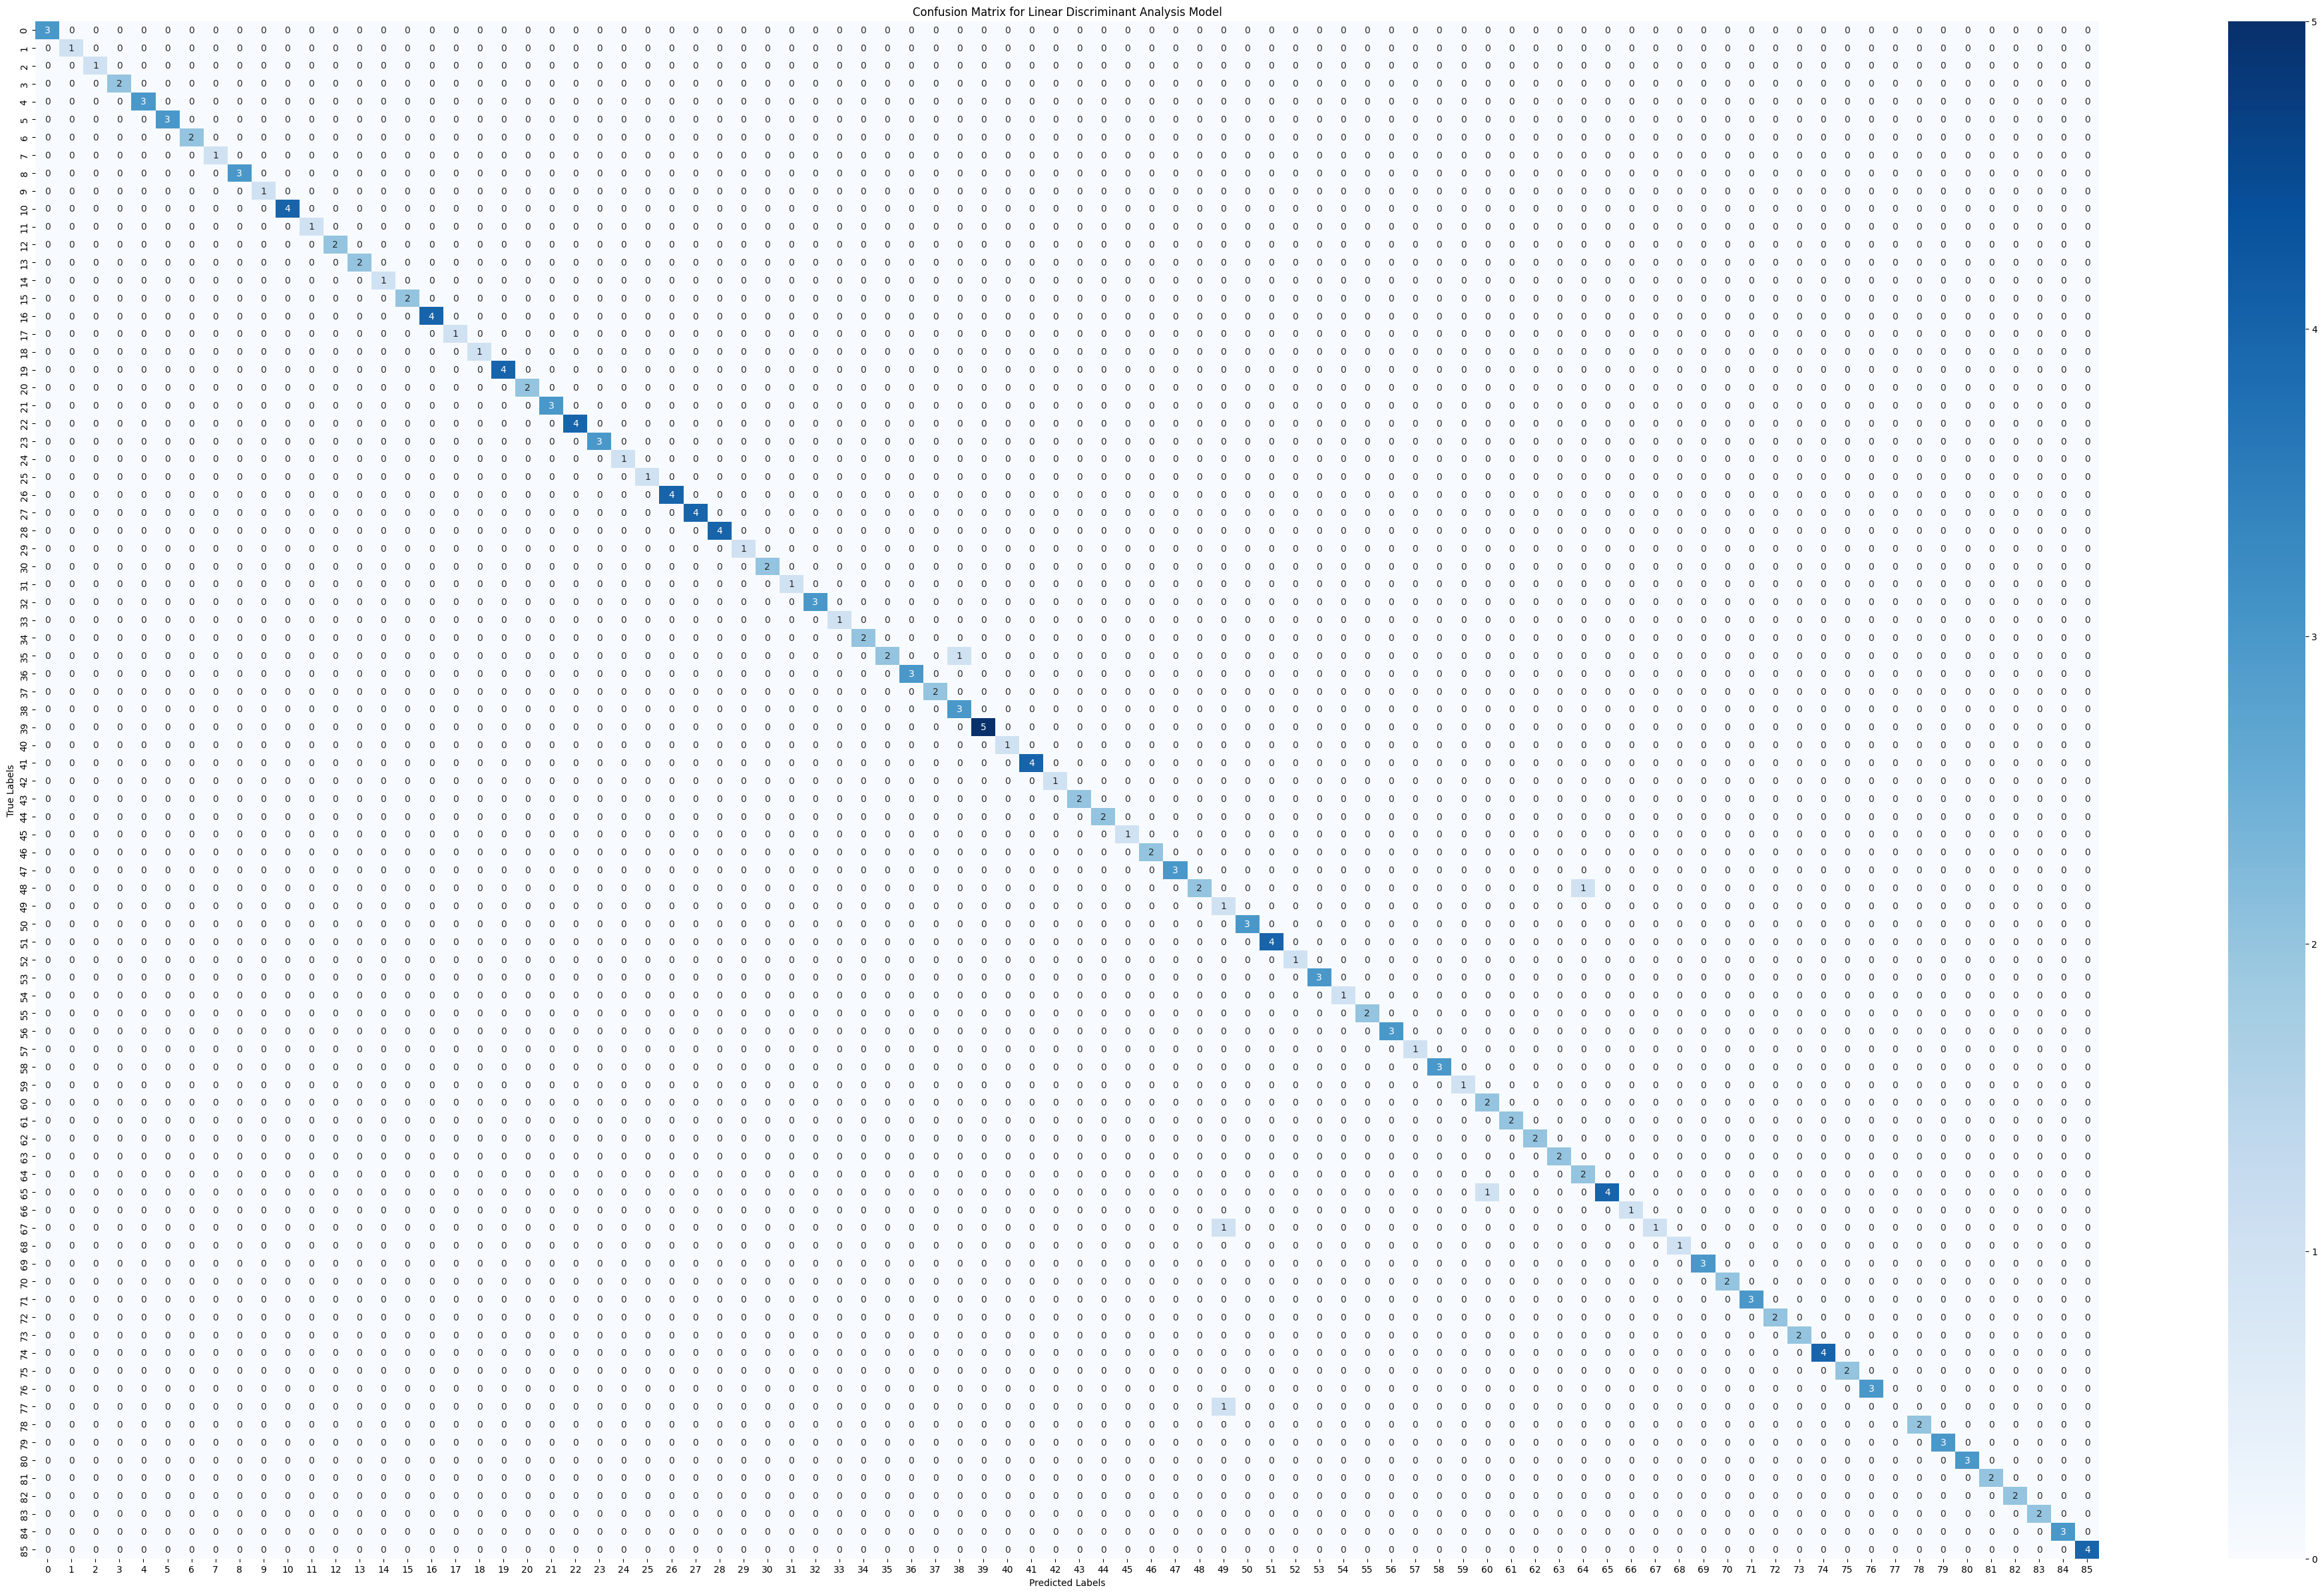

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Train and evaluate the Linear Discriminant Analysis model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
y_pred = lda_model.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(50,30))

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Linear Discriminant Analysis Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# RandomForestClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       0.67      1.00      0.80         2
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         4
          17       1.00    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


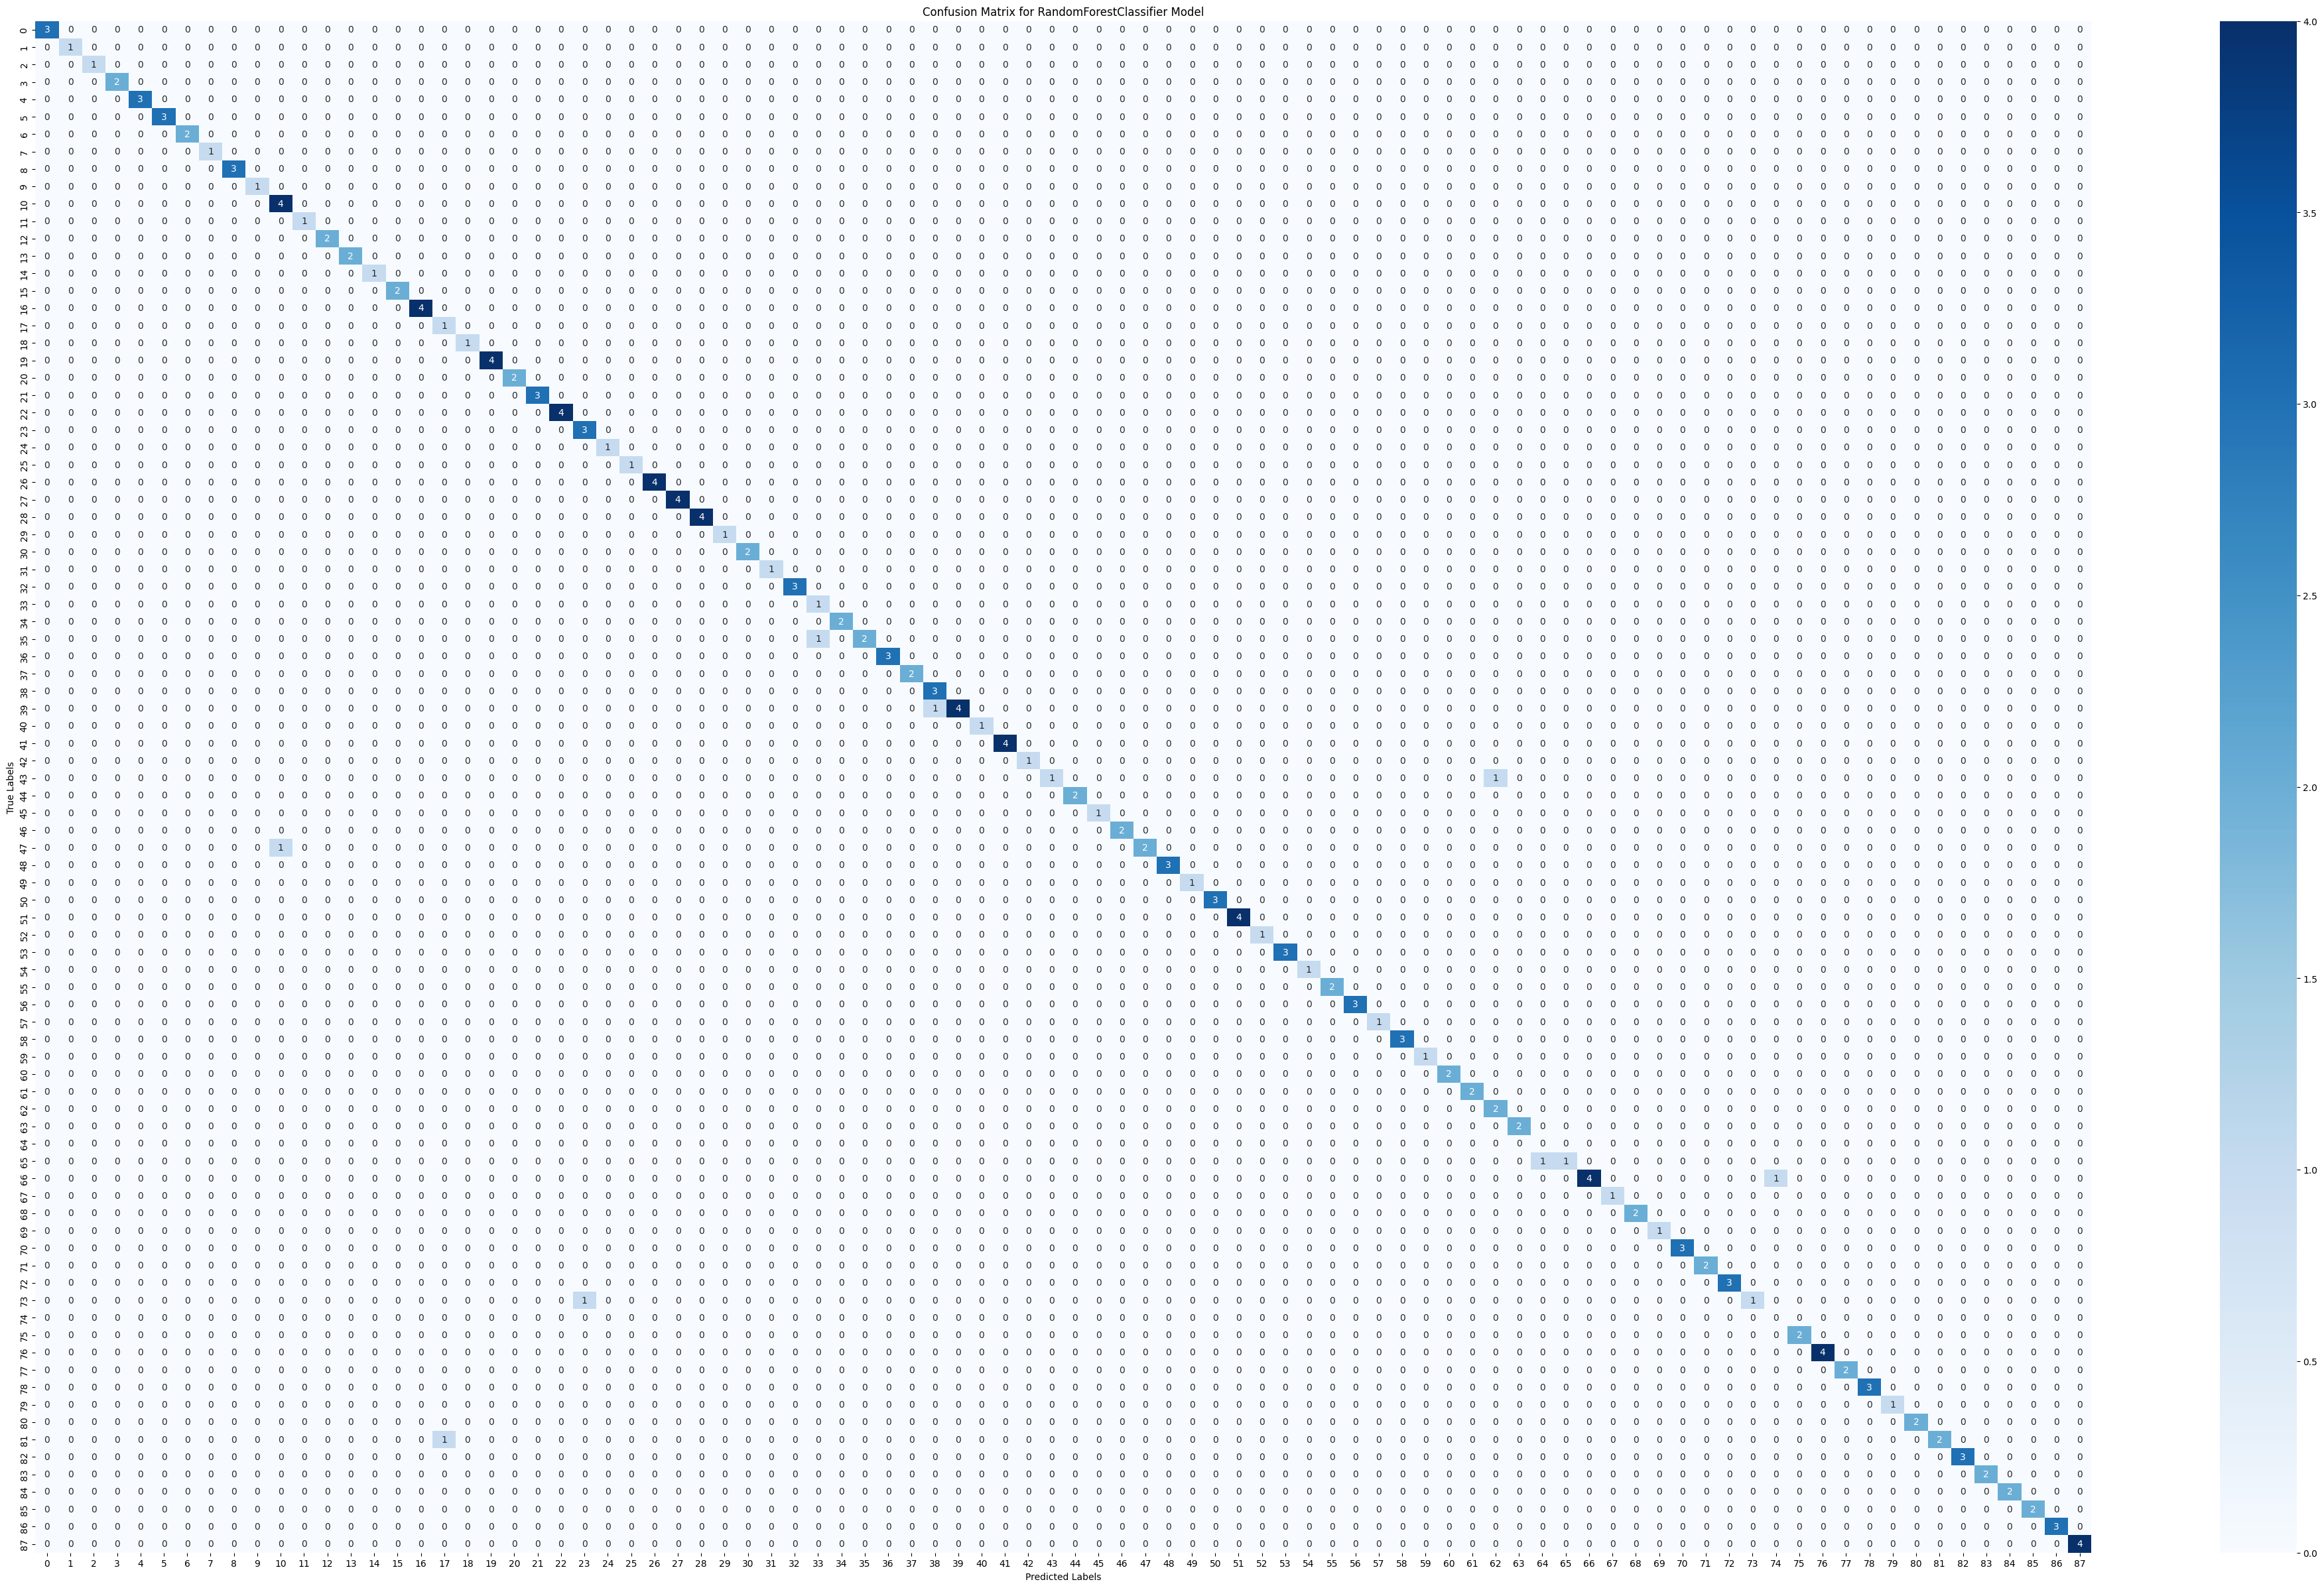

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Train and evaluate the RandomForestClassifier Model
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, pred_rfc)
plt.figure(figsize=(50,30))

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for RandomForestClassifier Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#  KNeighborsClassifier Model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         4
          17       1.00    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


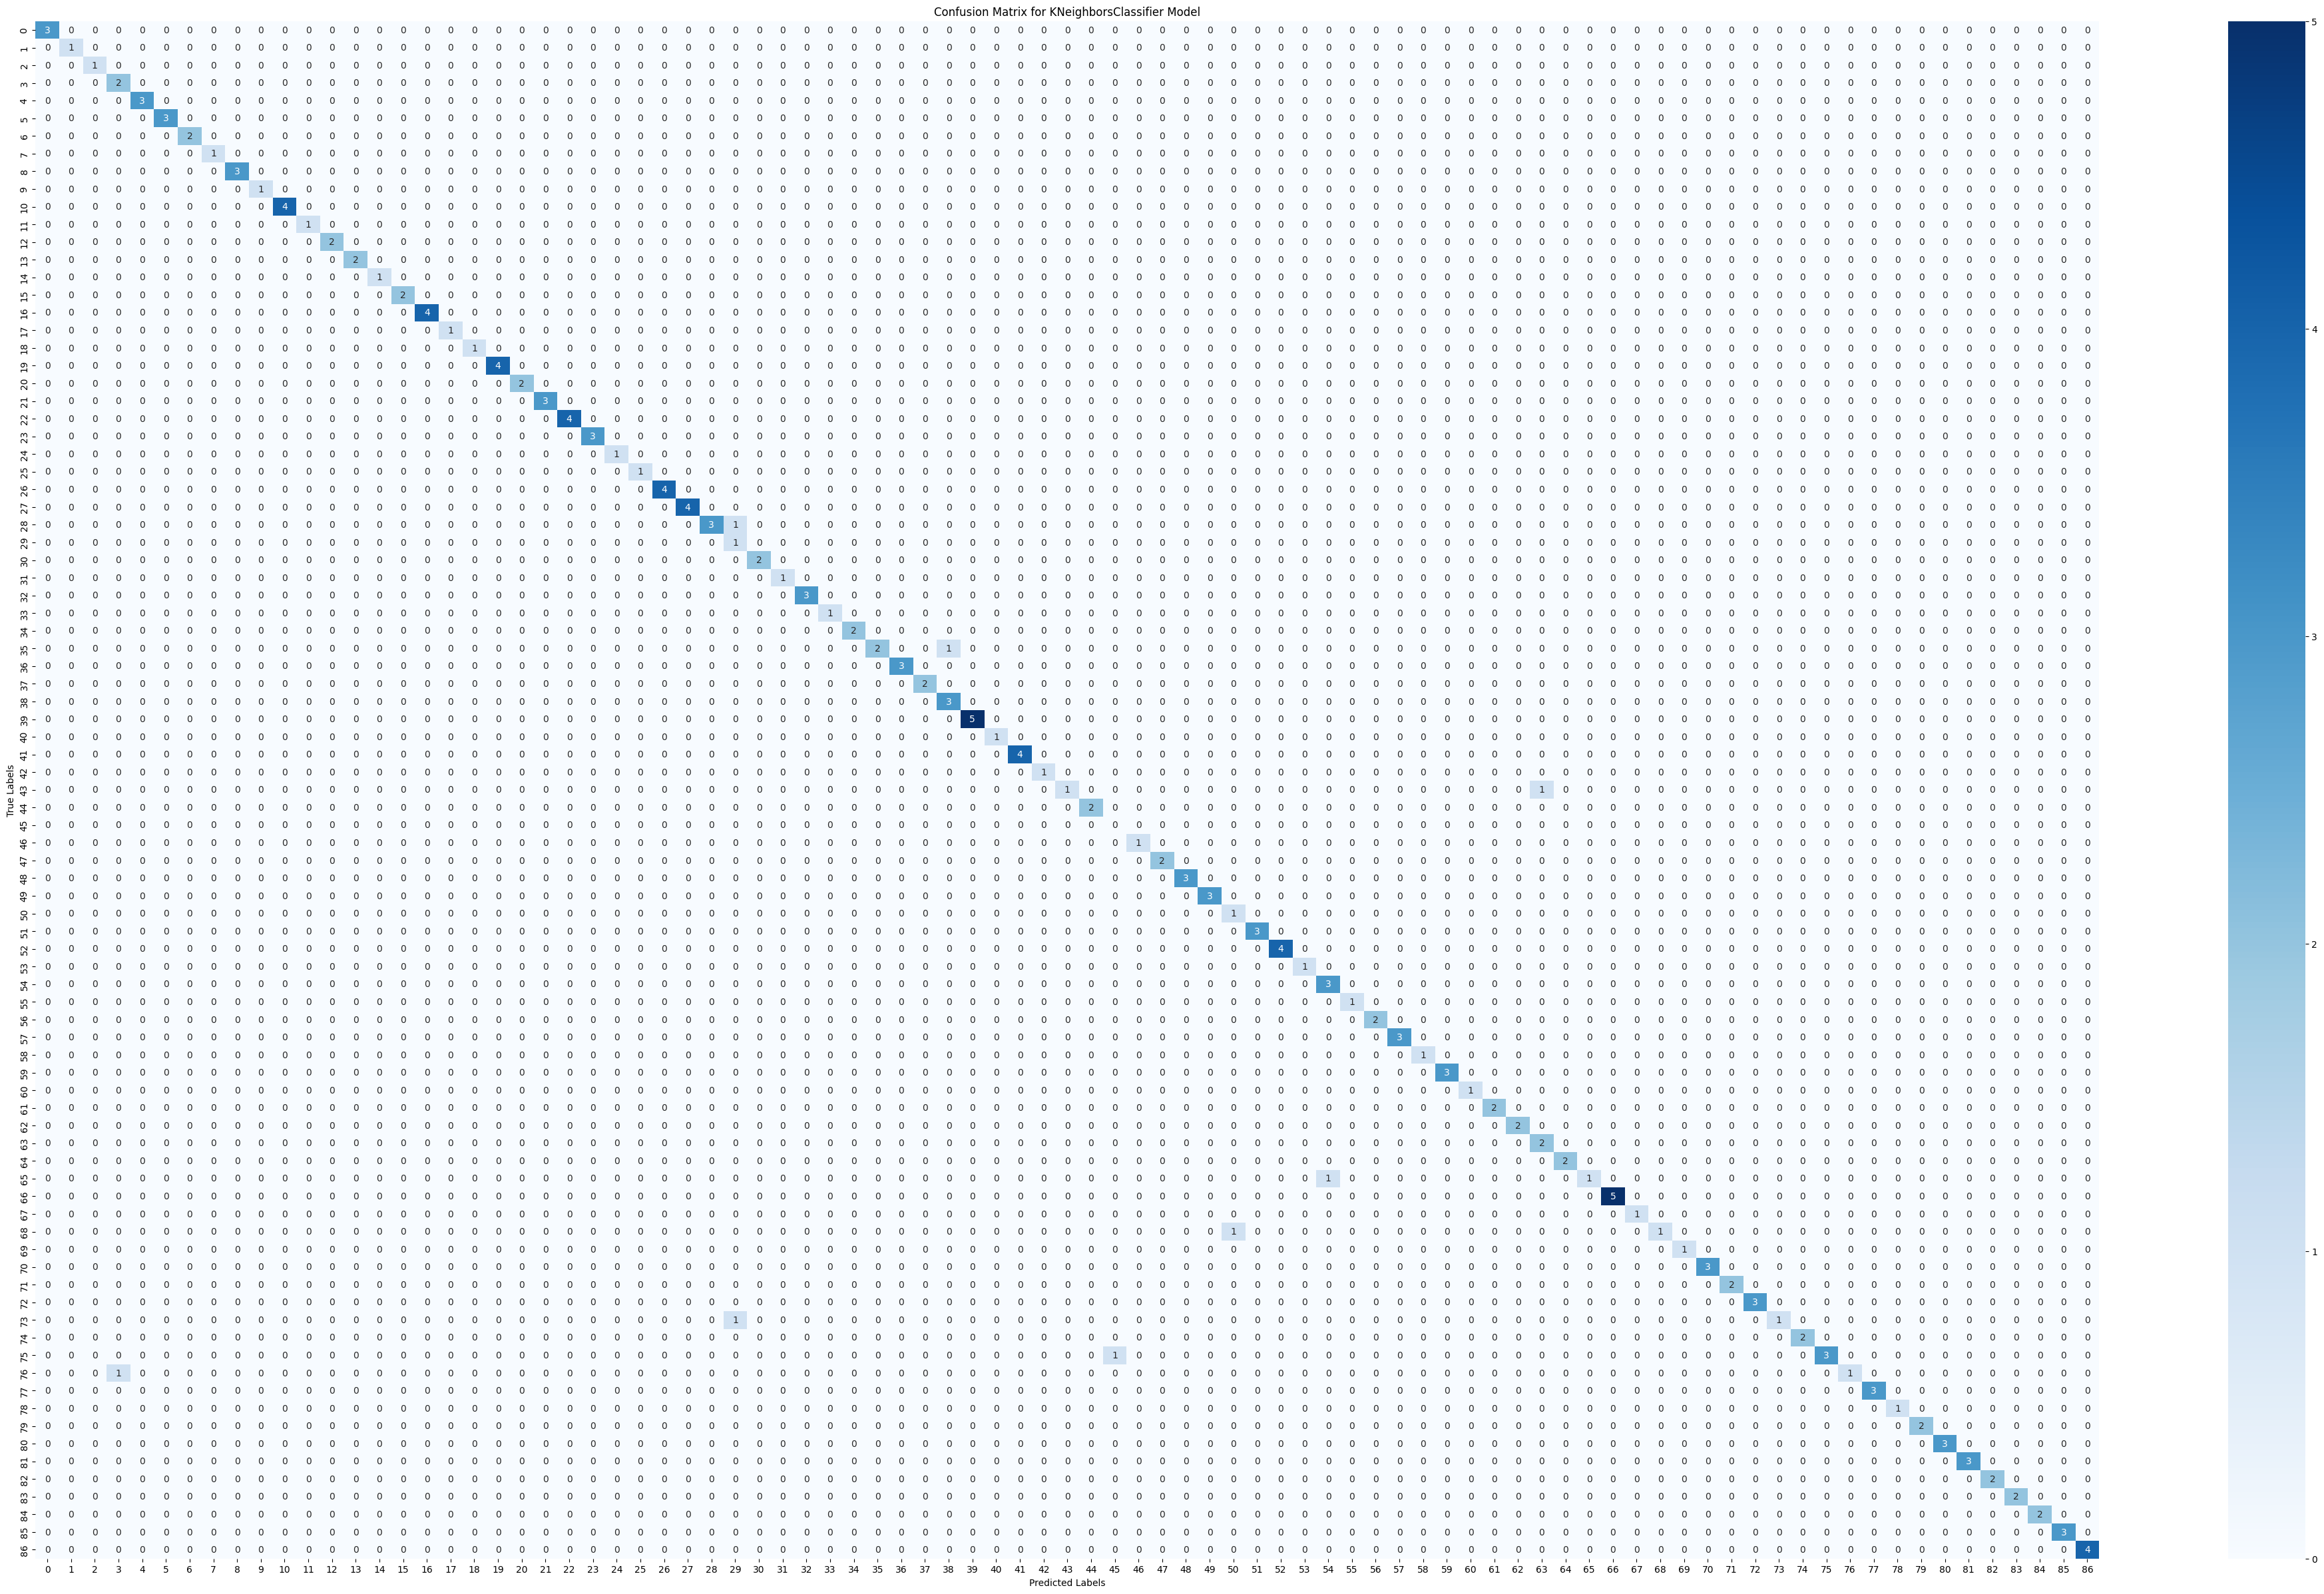

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Train and evaluate the KNeighborsClassifier Model
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, pred_knn)
plt.figure(figsize=(50,30))

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for KNeighborsClassifier Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#  Feed Forward Neural Network  

In [25]:
from sklearn.model_selection import train_test_split                 #importing train_test_split from sklearn to split data
x_train,x_test,y_train,y_test=train_test_split(X,Y1,shuffle=True,test_size=0.10,random_state=90) #split the data in 80:20 ratio 


In [26]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=90)

In [27]:
#Neural Network Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu,softmax

In [28]:
y_train.shape


(801, 99)

In [29]:
model = Sequential()
model.add(Dense(256, input_dim=192, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1600, activation='relu'))
model.add(Dense(99, activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [31]:
from keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath='Convolutional.hdf5',verbose=1,save_best_only=True)
history = model.fit(x_train, y_train, epochs=60, batch_size=64,validation_data=(x_val,y_val))

Epoch 1/60
13/13 [==============================] - 2s 53ms/step - loss: 3.8968 - accuracy: 0.1873 - val_loss: 2.5109 - val_accuracy: 0.4333
Epoch 2/60
13/13 [==============================] - 0s 33ms/step - loss: 1.1408 - accuracy: 0.7041 - val_loss: 1.0457 - val_accuracy: 0.6889
Epoch 3/60
13/13 [==============================] - 0s 32ms/step - loss: 0.4554 - accuracy: 0.8764 - val_loss: 0.3405 - val_accuracy: 0.9111
Epoch 4/60
13/13 [==============================] - 0s 32ms/step - loss: 0.1445 - accuracy: 0.9576 - val_loss: 0.2432 - val_accuracy: 0.9333
Epoch 5/60
13/13 [==============================] - 0s 32ms/step - loss: 0.0936 - accuracy: 0.9700 - val_loss: 0.6164 - val_accuracy: 0.8889
Epoch 6/60
13/13 [==============================] - 0s 33ms/step - loss: 0.0806 - accuracy: 0.9775 - val_loss: 0.1335 - val_accuracy: 0.9556
Epoch 7/60
13/13 [==============================] - 0s 32ms/step - loss: 0.0477 - accuracy: 0.9838 - val_loss: 0.1858 - val_accuracy: 0.9444
Epoch 8/60
13

In [32]:
score=model.evaluate(x_test,y_test,verbose=1)               #evaluates the model
accuracy=100*score[1]                                       
print('Test accuracy is %.4f%%' % accuracy)

4/4 [==============================] - 0s 7ms/step - loss: 0.1375 - accuracy: 0.9697
Test accuracy is 96.9697%


In [33]:
score=model.evaluate(x_train,y_train,verbose=1)               #evaluates the model
accuracy=100*score[1]                                       
print('Test accuracy is %.4f%%' % accuracy)

26/26 [==============================] - 0s 6ms/step - loss: 5.9668e-06 - accuracy: 1.0000
Test accuracy is 100.0000%


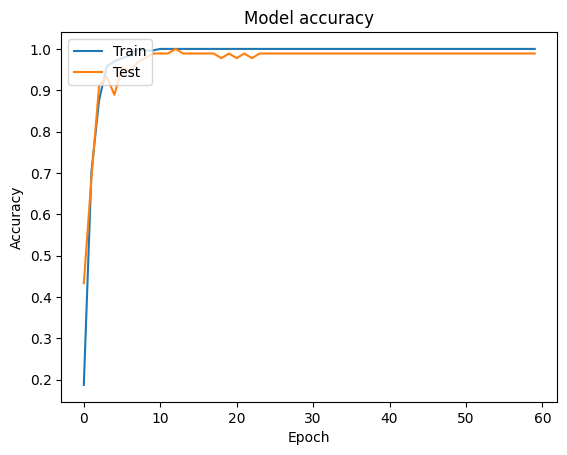

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()